# Problem Set 3
In this problem set you will get some practice with gradient descent and sub-gradient descent. There is a template for setting up your code and plotting your results at the end of this notebook, which you may find useful. Note that it is only a suggestion -- you are not required to use it.

In [ ]:
from __future__ import division
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [20, 5]

## Problem 1: Gradient Descent
Consider three quadratics, as given by:
$$
f_i(x) = \frac{1}{2} x^{\top}Q_ix + q_i^{\top} x + c_i,
$$
for the three triples $(Q_i,q_i,c_i)$, $i=1,2,3$ given below.

In [2]:
import numpy as np
Q1 = np.array([[ 1.17091573, -0.03686123, -0.1001259 ],
       [-0.03686123,  1.03835691,  0.17285956],
       [-0.1001259 ,  0.17285956,  1.06072736]])
Q2 = np.array([[ 15.27095759,  -1.97915834, -14.22190153],
       [ -1.97915834,   0.34660759,   1.91586927],
       [-14.22190153,   1.91586927,  15.76943482]])
Q3 = np.array([[28.59657006,  0.3684004 ,  0.90750259],
       [ 0.3684004 , 28.11480924,  0.81866989],
       [ 0.90750259,  0.81866989, 28.7886207 ]])
q1 = np.array([-4.68686663, -0.89027884, -1.57340281])
q2 = np.array([ 6.75973216,  1.23223936, -0.87956749])
q3 = np.array([ 0.8684369 , -4.69970837, -1.09690726])
c1 = 1.61888566;
c2 = -2.66426693;
c3 = 0.84184738;


Gradient of the function is given by:
$$
\nabla(f_i(x)) = \sum_{k=1}x_i\sum_{j=1}Q_{i_{kj}} + \sum_{j=1}q_{ij}
$$

In [3]:
# Gradient Descent
def gradient_descent(x, Q, q, c, step_size=0.1):
    # Update x
    gradient = 0
    for i in range(x.shape[0]): 
      gradient+=x[i]*np.sum(Q[i])
    
    gradient += np.sum(q)
    
    x = x-step_size*gradient
    return x

def descent(update, Q,q,c,step_size=0.1, T=int(1e4)):
    x = np.zeros((Q.shape[1],1))
#     print(x.shape)
    function_value = []
#     l1 = []
    for t in range(T):
        # update A (here subgradient, but you can re-use when we develop other algorithms)
        x = update(x,Q,q,c,step_size=step_size)
        
        # record error and l1 norm
        if (t % 1 == 0) or (t == T - 1):
#             print(x.T)
#             print(Q.shape)
#             print(x.T.shape)
#             print(x.T@Q)
# #             print(x.T)
#             print(0.5*x.T@Q@x+q@x+c)
            function_value.append((0.5*x.T@Q@x+q@x+c)[0])
#             l1.append(np.sum(abs(x)))

            assert not np.isnan(function_value[-1])

    return x, function_value

### Part (A)
Implement gradient descent with a step-size of $0.1$ for all three quadratics, and plot function value versus iteration number. Explain what you see.

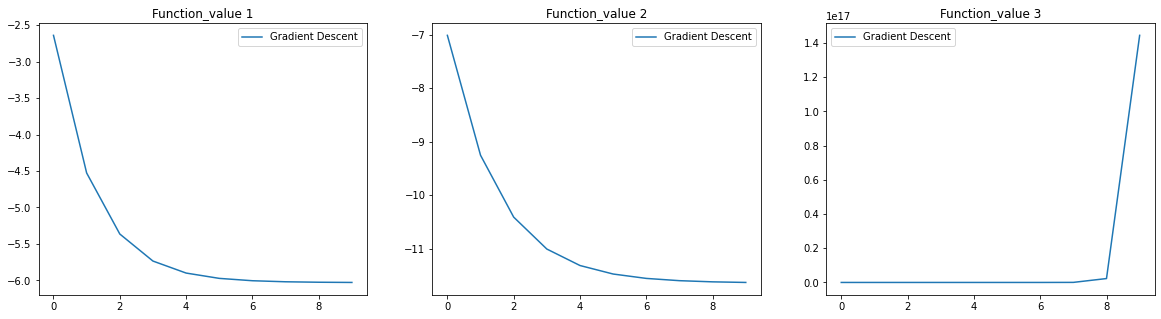

In [4]:
def main(T=10,step_size=0.1):

    # modify regularization parameters below
    x_gd, fval_gd = descent(gradient_descent, Q1,q1,c1,step_size=step_size,T=T)
#     print(fval_gd)

    plt.subplot(3, 3, 1) # row 1, col 2 index 1
    plt.plot(fval_gd, label='Gradient Descent')
    plt.title('Function_value 1')
    plt.legend()
#     plt.savefig('function_value_1.eps')
    
    x_gd, fval_gd = descent(gradient_descent, Q2,q2,c2,step_size=step_size,T=T)
#     print(fval_gd)

#     plt.clf()
    plt.subplot(1, 3, 2) # row 1, col 2 index 1
    plt.plot(fval_gd, label='Gradient Descent')
    plt.title('Function_value 2')
    plt.legend()
#     plt.savefig('function_value_2.eps')
    
    x_gd, fval_gd = descent(gradient_descent, Q3,q3,c3, T=T)
#     print(fval_gd)

#     plt.clf()
    plt.subplot(1, 3, 3) # row 1, col 2 index 1
    plt.plot(fval_gd, label='Gradient Descent')
    plt.title('Function_value 3')
    plt.legend()
#     plt.savefig('function_value_3.eps')

#     plt.clf()
#     plt.plot(l1_sg, label='Gradient Descent')
#     plt.title("$\ell^1$ Norm")
#     plt.legend()
#     plt.savefig('l1.eps')


if __name__ == "__main__":
    main()

### Part (B)
Find a step-size for each quadratic (it can be different for each), and implement gradient descent with this stepsize. Plot function value versus iteration number. Try to pick a step size that gives you fast convergence. How did you pick it?

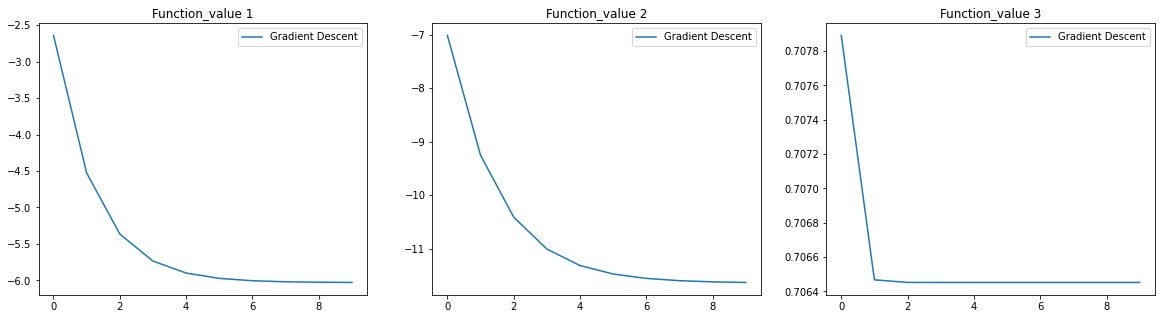

In [5]:
def main(T=10):
    
# modify regularization parameters below
    x_gd, fval_gd = descent(gradient_descent, Q1,q1,c1,step_size=0.1,T=T)
#     print(fval_gd)

    plt.subplot(1, 3, 1) # row 1, col 2 index 1
    plt.plot(fval_gd, label='Gradient Descent')
    plt.title('Function_value 1')
    plt.legend()
#     plt.savefig('function_value_1.eps')
    
    x_gd, fval_gd = descent(gradient_descent, Q2,q2,c2,step_size=0.1,T=T)
#     print(fval_gd)

#     plt.clf()
    plt.subplot(1, 3, 2) # row 1, col 2 index 1
    plt.plot(fval_gd, label='Gradient Descent')
    plt.title('Function_value 2')
    plt.legend()
#     plt.savefig('function_value_2.eps')
    
    x_gd, fval_gd = descent(gradient_descent, Q3,q3,c3,step_size=0.01, T=T)
#     print(fval_gd)

#     plt.clf()
    plt.subplot(1, 3, 3) # row 1, col 2 index 1
    plt.plot(fval_gd, label='Gradient Descent')
    plt.title('Function_value 3')
    plt.legend()
#     plt.savefig('function_value_3.eps')


if __name__ == "__main__":
    main()

How do we pick the step size? We pick a step size that helps in convergence of the function and doesn't cause the problem of vanishing or exploding gradients.

### Part (C)
Even with your carefully tuned choice of step size, you will see that the rates of convergence are not the same, Explain why this is the case.

**Answer C**

Gradient descent is a first-order optimization algorithm, which means it doesn’t take into account the second derivatives of the cost function. **The curvature of the function affects the size of each learning step**. The gradient measures the steepness of the curve but the second derivative measures the curvature of the curve.

### Part (D) -- Optional -- 
Read about back tracking line search (BTLS) and implement it here. 

## Problem 2: Sub-gradient Method
Consider a least squares problem with $\ell^1$ regularization:
$$
\min_x \left[f(x) = \frac{1}{2}\|{Ax-b}\|_2^2 + \lambda \|{x}\|_1 \right]
$$

This problem is often called LASSO (least absolute shrinkage and selection operator) and is known to induce {\em sparse} solutions with few nonzero elements in $x$, which can have advantages in terms of computation and interpretability. This problem is nonsmooth due to the regularization term. It is also not strongly convex when $A$ has more columns than rows. We (i.e., you) will solve this problem using several different algorithms in this class. We start with what we have seen thus far: the subgradient method. 

The dataset represented in the matrices provided in the numpy binary files A.npy and b.npy are from a diabetes dataset (scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) with 10 features that has been corrupted with an additional 90 noisy features. Thus a sparse solution should be very effective. Below you will find some skeleton code to help with loading the data, running the algorithm and plotting the results. Don't use stock optimization code, you should develop the core part of this assignment yourself.

In [6]:
def mod_subgrad(x):
  def f(x):
    if x>0:
      return 1
    elif x<0:
      return -1
    else:
      return np.random.choice([-1,1],size=1)
  return np.array([f(xi) for xi in x])

def subgradient(x, A, b, t, lam, c=0.0001):
    # update x (your code here), set c above
    step_size = c/(t+1)
#     print((A@x-b).shape)
    sub_grad = A.T@(A@x-b)+lam*(mod_subgrad(x).sum())
    x = x-step_size*sub_grad
    return x

def descent(update, A, b, reg, T=int(1e4)):
    x = np.zeros(A.shape[1])
    error = []
    l1 = []
    for t in range(T):
        # update A (here subgradient, but you can re-use when we develop other algorithms)
        x = update(x, A, b, t, reg)
        
        # record error and l1 norm
        if (t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            l1.append(np.sum(abs(x)))

            assert not np.isnan(error[-1])

    return x, error, l1

Minimize $f(x)$ using $10^4$ iterations of the subgradient method starting with $t=0$ and $x_0 =0$. 

### Part (A)
Use a decreasing step size of $\eta_t = c/t$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

### Part (B) 
Now use a more slowly decreasing step size of $\eta_t = c/\sqrt{t+1}$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

### Part (C)
Now try to find the best fixed step size. Plot the results and compare to the decreasing step size you see above. 

### Part (D) -- Optional --
If you did the BTLS optional part above, either implement BTLS for subgradient method, or explain why the challenges are with this. 


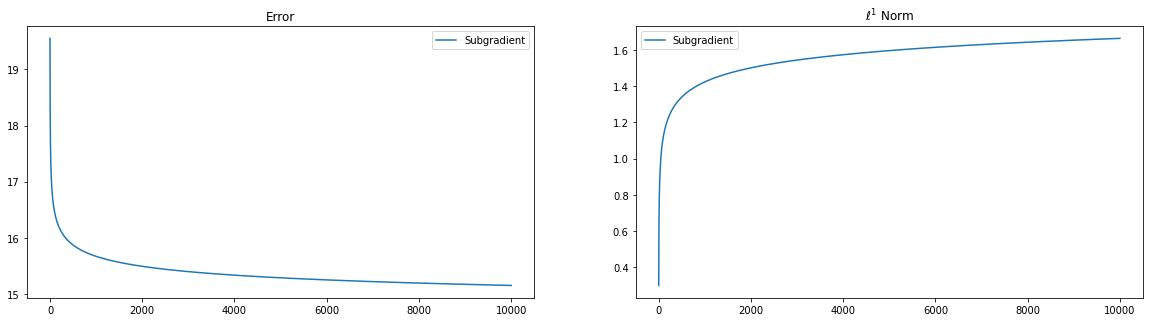

In [7]:
# PART A
def main(T=int(1e4)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    x_sg, error_sg, l1_sg = descent(subgradient, A, b,reg=0., T=T)

    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(error_sg, label='Subgradient')
    plt.title('Error')
    plt.legend()
#     plt.savefig('error.eps')

    plt.subplot(1, 2, 2) # row 1, col 2 index 1
    plt.plot(l1_sg, label='Subgradient')
    plt.title("$\ell^1$ Norm")
    plt.legend()
#     plt.savefig('l1.eps')


if __name__ == "__main__":
    main()

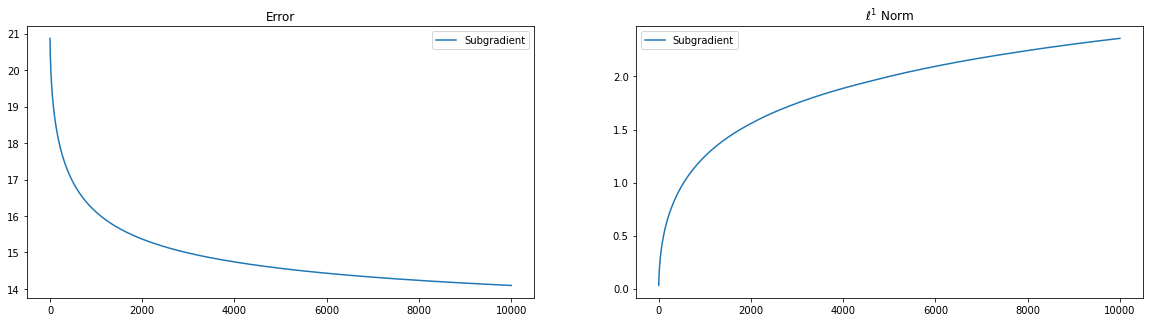

In [8]:
# PART B

def subgradient2(x, A, b, t, lam, c=1e-5):
    # update x (your code here), set c above
    step_size = c/np.sqrt((t+1))
#     print((A@x-b).shape)
    sub_grad = A.T@(A@x-b)+lam*(mod_subgrad(x).sum())
    x = x-step_size*sub_grad
    return x
  
def main(T=int(1e4)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    x_sg, error_sg, l1_sg = descent(subgradient2, A, b,reg=0., T=T)

    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(error_sg, label='Subgradient')
    plt.title('Error')
    plt.legend()
#     plt.savefig('error.eps')

    plt.subplot(1, 2, 2) # row 1, col 2 index 1
    plt.plot(l1_sg, label='Subgradient')
    plt.title("$\ell^1$ Norm")
    plt.legend()
#     plt.savefig('l1.eps')


if __name__ == "__main__":
    main()

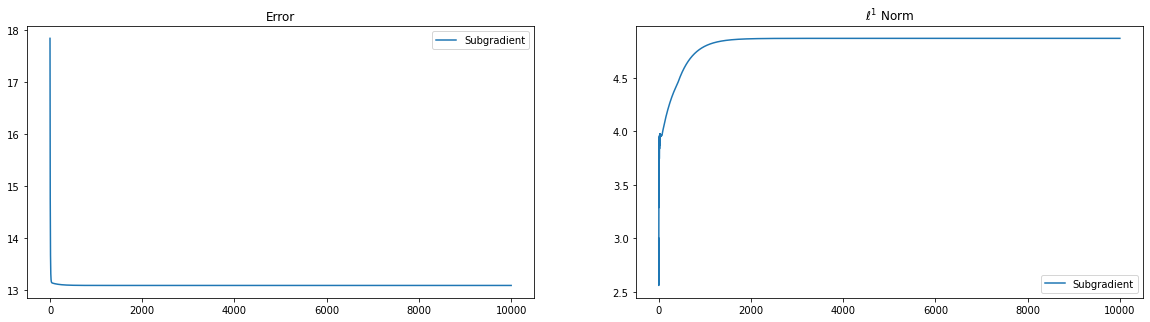

In [13]:
# Part C
def subgradient3(x, A, b, t, lam, c=1e-5):
    # update x (your code here), set c above
    # Fixed step size
#     print((A@x-b).shape)
    step_size = 0.001
    sub_grad = A.T@(A@x-b)+lam*(mod_subgrad(x).sum())
    x = x-step_size*sub_grad
    return x
  
def main(T=int(1e4)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    x_sg, error_sg, l1_sg = descent(subgradient3, A, b,reg=0., T=T)

    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(error_sg, label='Subgradient')
    plt.title('Error')
    plt.legend()
#     plt.savefig('error.eps')

    plt.subplot(1, 2, 2) # row 1, col 2 index 1
    plt.plot(l1_sg, label='Subgradient')
    plt.title("$\ell^1$ Norm")
    plt.legend()
#     plt.savefig('l1.eps')


if __name__ == "__main__":
    main()

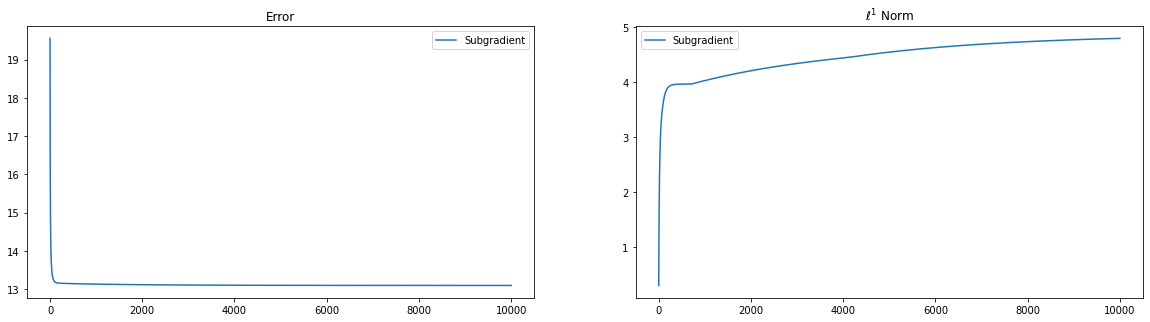

In [14]:
def subgradient3(x, A, b, t, lam, c=1e-5):
    # update x (your code here), set c above
    # Fixed step size
#     print((A@x-b).shape)
    step_size = 0.0001
    sub_grad = A.T@(A@x-b)+lam*(mod_subgrad(x).sum())
    x = x-step_size*sub_grad
    return x
  
def main(T=int(1e4)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    x_sg, error_sg, l1_sg = descent(subgradient3, A, b,reg=0., T=T)

    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(error_sg, label='Subgradient')
    plt.title('Error')
    plt.legend()
#     plt.savefig('error.eps')

    plt.subplot(1, 2, 2) # row 1, col 2 index 1
    plt.plot(l1_sg, label='Subgradient')
    plt.title("$\ell^1$ Norm")
    plt.legend()
#     plt.savefig('l1.eps')


if __name__ == "__main__":
    main()

### Observations - 

When compared to the above functions, the convergence is more steep when we set the step size (in the above cases). The convergence is more gradual if the step size is ~ 1e4 vs when the step size is ~ 1e3. The steeper the convergence the better and hence, **1e3 is the chosen step size**. When compared to the changing step sizes also, **the constant step size converges faster**.

Here is a template that may be useful. Note that it is designed for the LASSO problem, so you will have to modify it to use it for the quadratic problems at the beginning, but the ideas are the same.

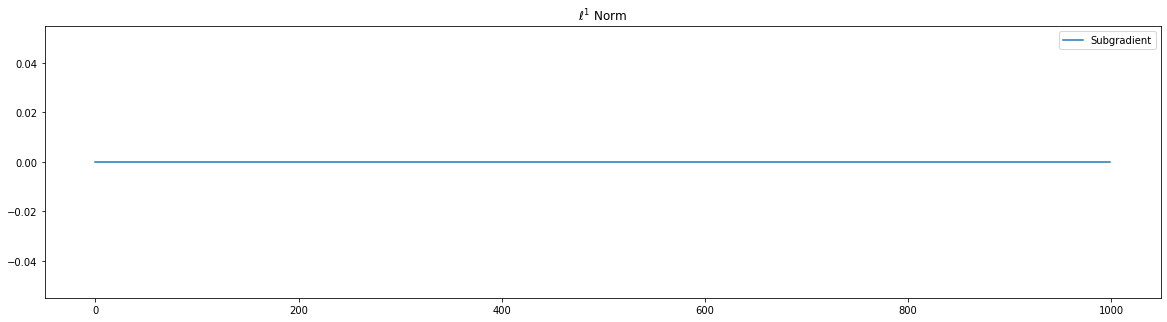

In [10]:
from __future__ import division
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import time


def subgradient(x, A, b, t, lam, c=1e-5):
    # update x (your code here), set c above
    return x

def descent(update, A, b, reg, T=int(1e4)):
    x = np.zeros(A.shape[1])
    error = []
    l1 = []
    for t in range(T):
        # update A (here subgradient, but you can re-use when we develop other algorithms)
        x = update(x, A, b, t, reg)
        
        # record error and l1 norm
        if (t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            l1.append(np.sum(abs(x)))

            assert not np.isnan(error[-1])

    return x, error, l1


def main(T=int(1e3)):
    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    x_sg, error_sg, l1_sg = descent(subgradient, A, b, reg=0., T=T)

    plt.clf()
    plt.plot(error_sg, label='Subgradient')
    plt.title('Error')
    plt.legend()
#     plt.savefig('error.eps')

    plt.clf()
    plt.plot(l1_sg, label='Subgradient')
    plt.title("$\ell^1$ Norm")
    plt.legend()
#     plt.savefig('l1.eps')


if __name__ == "__main__":
    main()